In [29]:
import re
import pandas as pd

In [30]:
df = pd.read_csv('../../assets/immoweb_properties_data.csv')

def extract_from_url(url):
    list_url = url.split("/")
    building_type = list_url[5]
    municipality=list_url[7]
    zipcode= int(list_url[8])
    immoweb_id = int(list_url[9])
    return [building_type, municipality, zipcode, immoweb_id]

def get_id(url):
    return extract_from_url(url)[3]
def get_type(url):
    return extract_from_url(url)[0]
def get_municipality(url):
    return extract_from_url(url)[1]
def get_zipcode(url):
    return extract_from_url(url)[2]

def split_url_info(df):
    df['id'] = df['url'].apply(get_id)
    df['building_type'] = df['url'].apply(get_type)
    df['municipality'] = df['url'].apply(get_municipality)
    df['zipcode'] = df['url'].apply(get_zipcode)
    df = df.set_index('id', drop = True)
    df = df.drop('url', axis = 1)
    return df


if __name__== "__main__":
    df = split_url_info(df)
    print(df.head())

C:\Users\HP\AppData\Local\Temp\ipykernel_10312\380078434.py:1: DtypeWarning: Columns (110) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../assets/immoweb_properties_data.csv')


                  Available as of              Available date   
id                                                              
10567498   After signing the deed      May 15 2023 - 12:00 AM  \
10567435                      NaN                         NaN   
10557731  Depending on the tenant  December 1 2022 - 12:00 AM   
10567501   After signing the deed      May 15 2023 - 12:00 AM   
10557727   After signing the deed   August 24 2023 - 12:00 AM   

          Construction year  Floor  Number of floors Building condition   
id                                                                        
10567498             1954.0    5.0               6.0               Good  \
10567435             2010.0    4.0               NaN               Good   
10557731             2010.0    2.0               2.0               Good   
10567501             1954.0    5.0               6.0               Good   
10557727             2005.0    1.0               3.0               Good   

         Street fr

In [31]:
columns = [
    "Building condition",
    "Number of frontages",
    "Surroundings type",
    "Living area",
    "Living room surface",
    "Kitchen type",
    "Bedrooms",
    "Bathrooms",
    "Shower rooms",
    "Toilets",
    "Basement",
    "Furnished",
    "Terrace",
    "Elevator",
    "Swimming pool",
    "Energy class",
    "Heating type",
    "Price",
    "Address",
    "Flood zone type",
    "Neighbourhood or locality",
    "Outdoor parking spaces",
    "Garden surface",
    "Terrace surface",
    "Garden",
    "Monthly charges",
    "zipcode",
    "building_type",
    "building_subtype",
    "municipality"
]

In [32]:
base_csv = pd.read_csv('../../assets/immoweb_properties_data.csv')
df = base_csv[base_csv["url"].str.contains("new-real-estate-project") == False]
df = split_url_info(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_10312\2810520285.py:1: DtypeWarning: Columns (110) have mixed types. Specify dtype option on import or set low_memory=False.
  base_csv = pd.read_csv('../../assets/immoweb_properties_data.csv')
C:\Users\HP\AppData\Local\Temp\ipykernel_10312\380078434.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = df['url'].apply(get_id)
C:\Users\HP\AppData\Local\Temp\ipykernel_10312\380078434.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['building_type'] = 

In [33]:
df['building_subtype'] = df['building_type']

In [34]:
pd.unique(df["building_subtype"])

array(['apartment', 'loft', 'flat-studio', 'house', 'duplex',
       'service-flat', 'apartment-block', 'triplex', 'mansion',
       'penthouse', 'villa', 'mixed-use-building', 'bungalow',
       'exceptional-property', 'manor-house', 'country-cottage',
       'ground-floor', 'town-house', 'castle', 'chalet', 'kot',
       'other-property', 'farmhouse'], dtype=object)

In [35]:
df['building_type'] = df['building_subtype'].apply(lambda x: 'house' if x in ['house', 'villa', 'mansion', 'manor-house', 'country-cottage', 'town-house', 'chalet', 'farmhouse'] else ('apartment' if x in ['apartment', 'loft', 'flat-studio', 'duplex', 'service-flat', 'apartment-block', 'triplex', 'penthouse', 'ground-floor', 'kot'] else 'other-property'))


In [36]:
df = df[columns]
pd.unique(df["building_subtype"])
df

,Building condition,Number of frontages,Surroundings type,Living area,Living room surface,Kitchen type,Bedrooms,Bathrooms,Shower rooms,Toilets,...,Neighbourhood or locality,Outdoor parking spaces,Garden surface,Terrace surface,Garden,Monthly charges,zipcode,building_type,building_subtype,municipality
id,,,,,,,,,,,,,,,,,,,,,
10567498,Good,3.0,Isolated,212 m² square meters,60 m² square meters,Installed,4.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1050,apartment,apartment,ixelles
10567435,Good,2.0,NaN,258 m² square meters,NaN,Hyper equipped,2.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3020,apartment,loft,herent
10557731,Good,4.0,Urban,94 m² square meters,34 m² square meters,Installed,2.0,1.0,1.0,1.0,...,Liège environs,1.0,NaN,NaN,NaN,NaN,4820,apartment,apartment,dison
10567501,Good,3.0,Isolated,212 m² square meters,60 m² square meters,Installed,4.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1060,apartment,apartment,saint-gilles
10557727,Good,2.0,Isolated,111 m² square meters,30 m² square meters,Installed,3.0,1.0,1.0,1.0,...,Oupeye,1.0,200 m² square meters,NaN,NaN,NaN,4680,apartment,apartment,oupeye
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10556993,Just renovated,2.0,NaN,180 m² square meters,NaN,Installed,3.0,2.0,NaN,NaN,...,NaN,NaN,NaN,40 m² square meters,Yes,NaN,8970,house,house,poperinge
10559628,NaN,4.0,NaN,130 m² square meters,25 m² square meters,Installed,3.0,1.0,NaN,2.0,...,NaN,2.0,NaN,NaN,Yes,NaN,1325,house,house,dion-le-mont
10556903,Good,2.0,NaN,262 m² square meters,NaN,Installed,6.0,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9000,house,house,gent


In [37]:
df.isnull().sum().sort_values(ascending=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9341 entries, 10567498 to 10557579
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building condition         8287 non-null   object 
 1   Number of frontages        7663 non-null   float64
 2   Surroundings type          4011 non-null   object 
 3   Living area                9209 non-null   object 
 4   Living room surface        5725 non-null   object 
 5   Kitchen type               8302 non-null   object 
 6   Bedrooms                   9189 non-null   float64
 7   Bathrooms                  8137 non-null   float64
 8   Shower rooms               3144 non-null   float64
 9   Toilets                    8510 non-null   float64
 10  Basement                   4493 non-null   object 
 11  Furnished                  5053 non-null   object 
 12  Terrace                    2042 non-null   object 
 13  Elevator                   5138 non-null  

In [38]:
df.dropna(subset=["Living area", "Bedrooms", "Price"])
df

,Building condition,Number of frontages,Surroundings type,Living area,Living room surface,Kitchen type,Bedrooms,Bathrooms,Shower rooms,Toilets,...,Neighbourhood or locality,Outdoor parking spaces,Garden surface,Terrace surface,Garden,Monthly charges,zipcode,building_type,building_subtype,municipality
id,,,,,,,,,,,,,,,,,,,,,
10567498,Good,3.0,Isolated,212 m² square meters,60 m² square meters,Installed,4.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1050,apartment,apartment,ixelles
10567435,Good,2.0,NaN,258 m² square meters,NaN,Hyper equipped,2.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3020,apartment,loft,herent
10557731,Good,4.0,Urban,94 m² square meters,34 m² square meters,Installed,2.0,1.0,1.0,1.0,...,Liège environs,1.0,NaN,NaN,NaN,NaN,4820,apartment,apartment,dison
10567501,Good,3.0,Isolated,212 m² square meters,60 m² square meters,Installed,4.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1060,apartment,apartment,saint-gilles
10557727,Good,2.0,Isolated,111 m² square meters,30 m² square meters,Installed,3.0,1.0,1.0,1.0,...,Oupeye,1.0,200 m² square meters,NaN,NaN,NaN,4680,apartment,apartment,oupeye
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10556993,Just renovated,2.0,NaN,180 m² square meters,NaN,Installed,3.0,2.0,NaN,NaN,...,NaN,NaN,NaN,40 m² square meters,Yes,NaN,8970,house,house,poperinge
10559628,NaN,4.0,NaN,130 m² square meters,25 m² square meters,Installed,3.0,1.0,NaN,2.0,...,NaN,2.0,NaN,NaN,Yes,NaN,1325,house,house,dion-le-mont
10556903,Good,2.0,NaN,262 m² square meters,NaN,Installed,6.0,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9000,house,house,gent


In [40]:
df = pd.read_csv("../../assets/cleaned_data.csv")
df.head()

,id,building_type,building_subtype,price,living_area,frontages,bedrooms,bathrooms,liv_room_surf,kitchen_type,...,swimming_pool,status_build,furnished,energy_class,heating,flood_zone,surroundings,zipcode,municipality,province
0,10567498,apartment,apartment,730000.0,212.0,3.0,4.0,2.0,60.0,1.0,...,0.0,2.0,0.0,2.0,Gas,NaN,Isolated,1050,Ixelles,Brussels Capital Region
1,10567435,apartment,loft,775000.0,258.0,2.0,2.0,1.0,NaN,3.0,...,NaN,2.0,1.0,7.0,Gas,Non flood zone,NaN,3020,Winksele,Flemish Brabant
2,10557731,apartment,apartment,99000.0,94.0,4.0,2.0,1.0,34.0,1.0,...,0.0,2.0,0.0,3.0,Gas,Non flood zone,Urban,4820,Dison,Liège
3,10567501,apartment,apartment,730000.0,212.0,3.0,4.0,2.0,60.0,1.0,...,0.0,2.0,0.0,2.0,Gas,NaN,Isolated,1060,Saint-Gilles,Brussels Capital Region
4,10557727,apartment,apartment,219000.0,111.0,2.0,3.0,1.0,30.0,1.0,...,0.0,2.0,0.0,6.0,Gas,Non flood zone,Isolated,4680,Oupeye,Liège


In [53]:
data = pd.read_csv("../../assets/cleaned_data.csv")
data.head()

,id,building_type,building_subtype,price,living_area,frontages,bedrooms,bathrooms,liv_room_surf,kitchen_type,...,swimming_pool,status_build,furnished,energy_class,heating,flood_zone,surroundings,zipcode,municipality,province
0,10567498,apartment,apartment,730000.0,212.0,3.0,4.0,2.0,60.0,1.0,...,0.0,2.0,0.0,2.0,Gas,NaN,Isolated,1050,Ixelles,Brussels Capital Region
1,10567435,apartment,loft,775000.0,258.0,2.0,2.0,1.0,NaN,3.0,...,NaN,2.0,1.0,7.0,Gas,Non flood zone,NaN,3020,Winksele,Flemish Brabant
2,10557731,apartment,apartment,99000.0,94.0,4.0,2.0,1.0,34.0,1.0,...,0.0,2.0,0.0,3.0,Gas,Non flood zone,Urban,4820,Dison,Liège
3,10567501,apartment,apartment,730000.0,212.0,3.0,4.0,2.0,60.0,1.0,...,0.0,2.0,0.0,2.0,Gas,NaN,Isolated,1060,Saint-Gilles,Brussels Capital Region
4,10557727,apartment,apartment,219000.0,111.0,2.0,3.0,1.0,30.0,1.0,...,0.0,2.0,0.0,6.0,Gas,Non flood zone,Isolated,4680,Oupeye,Liège


<Axes: xlabel='price', ylabel='Count'>

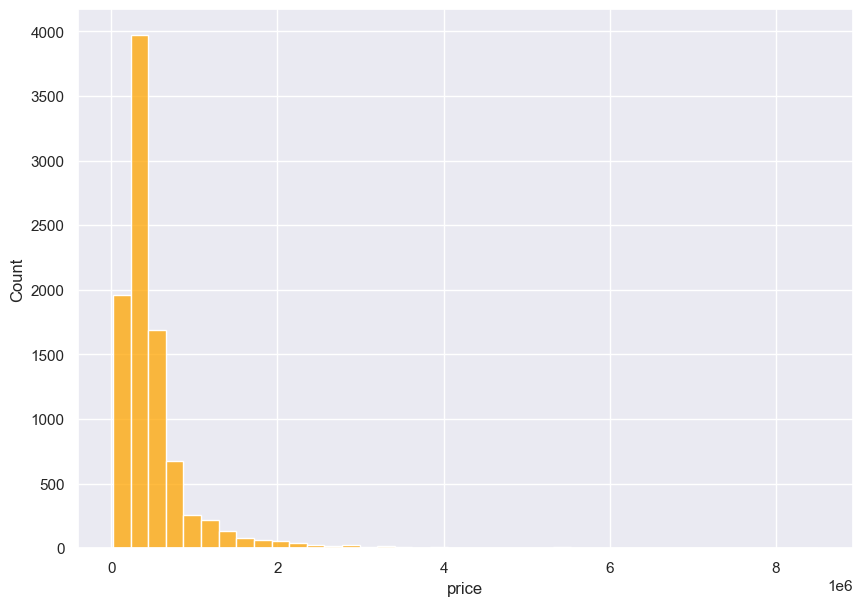

In [54]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10,7)})
sns.histplot(data = df['price'], color = 'orange', bins=40)

In [58]:
q = data["price"].quantile(0.995)
df = data[data["price"] < q]
df.describe(include="all")

,id,building_type,building_subtype,price,living_area,frontages,bedrooms,bathrooms,liv_room_surf,kitchen_type,...,swimming_pool,status_build,furnished,energy_class,heating,flood_zone,surroundings,zipcode,municipality,province
count,9.257000e+03,9257,9257,9.257000e+03,9125.000000,7590.000000,9105.000000,8056.000000,5680.000000,8227.000000,...,3923.000000,8206.000000,5015.000000,9257.000000,8004,5059,3981,9257.000000,9257,9257
unique,NaN,3,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7,9,9,NaN,521,11
top,NaN,house,house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Gas,Non flood zone,Urban,NaN,Uccle,Brussels Capital Region
freq,NaN,4485,3580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5754,4784,1562,NaN,342,2366
mean,1.042276e+07,NaN,NaN,4.869382e+05,180.163616,2.776153,3.107084,1.519116,36.811444,1.751185,...,0.070864,2.025469,0.067797,3.869801,NaN,NaN,NaN,4241.425516,NaN,NaN
std,2.147608e+05,NaN,NaN,4.359675e+05,251.367022,0.861520,1.630949,1.092668,49.957966,0.970616,...,0.256630,0.971732,0.251422,1.942630,NaN,NaN,NaN,3129.628429,NaN,NaN
min,7.799663e+06,NaN,NaN,2.000000e+04,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1000.000000,NaN,NaN
25%,1.038963e+07,NaN,NaN,2.490000e+05,96.000000,2.000000,2.000000,1.000000,26.000000,1.000000,...,0.000000,2.000000,0.000000,2.000000,NaN,NaN,NaN,1200.000000,NaN,NaN
50%,1.049251e+07,NaN,NaN,3.550000e+05,145.000000,3.000000,3.000000,1.000000,33.000000,1.000000,...,0.000000,2.000000,0.000000,4.000000,NaN,NaN,NaN,3050.000000,NaN,NaN
75%,1.054147e+07,NaN,NaN,5.500000e+05,215.000000,4.000000,4.000000,2.000000,42.000000,3.000000,...,0.000000,3.000000,0.000000,6.000000,NaN,NaN,NaN,7170.000000,NaN,NaN


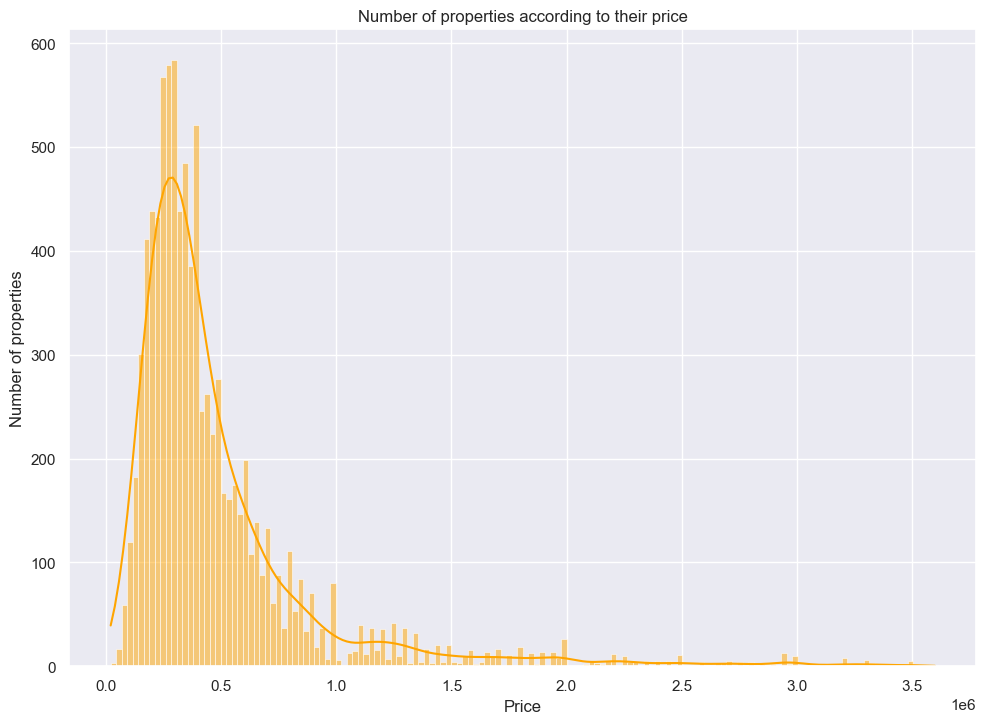

In [65]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.histplot(df["price"], color = 'orange', bins=150, kde = True)
plt.xlabel('Price')
plt.ylabel('Number of properties')
plt.title('Number of properties according to their price')
plt.show()